Importing the dependencies


In [1]:
import numpy as np
import pandas as pd#loading our data into tables
from sklearn.model_selection import train_test_split #This function is used to split data into training and testing sets.
from sklearn.linear_model import LogisticRegression # machine learning model used for classification tasks.
from sklearn.metrics import accuracy_score #calculates accuracy of the model

ModuleNotFoundError: No module named 'numpy'

Data collection and Data processing


In [ ]:
#loading the data set to a pandas framework
sonar_data=pd.read_csv('/content/Copy of sonar data.csv',header=None) #header file means name for the coloms, and since its in .csv file, we write read_csv

In [ ]:
sonar_data.head()#displays first 5 rows of the data set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and coloumns, to find on google, just google pandas.read_csv
sonar_data.shape

(208, 61)

In [ ]:
#to get statistical data about our data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [ ]:
#this counts the total different values available in the coloumn, in the 60th coloumn in the file we have wether if its metal or rock
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M-> mines
R-> Rock

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
#seperating data and Labels
X=sonar_data.drop(columns=60,axis=1) #taking all the values except the values in the 60th column
Y=sonar_data[60]#taking only the values in the 60th columns

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5   ...      54      55      56      57      58      59
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  ...  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  ...  0.0094  0.0191  0.0140  0.0049  0.0052  0.0044
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  ...  0.0180  0.0244  0.0316  0.0164  0.0095  0.0078
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  ...  0.0085  0.0073  0.0050  0.0044  0.0040  0.0117
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  ...  0.0110  0.0015  0.0072  0.0048  0.0107  0.0094
..      ...     ...     ...     ...     ...     ...  ...     ...     ...     ...     ...     ...     ...
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  ...  0.0033  0.0101  0.0065  0.0115  0.0193  0.0157
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  ...  0.0063  0.0063  0.0034  0.0032  0.0062  0.0067
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  ..

Training and Test Data

In [ ]:
#train -training data, test- testing data, the split thingy is for splitting the data
#test size is nothing but percentage, so 0.1% of 200 sample size meaning 20 samples will be taken for x_test
'''
 train_test_split(X, Y, ...):
X: This is the feature matrix (the independent variables or inputs of your model), which typically contains all the columns except the target label.
Y: This is the target variable (the dependent variable, label, or output you're predicting), typically a column representing categories or outcomes (like "M" and "R").
test_size=0.1:
This argument specifies that 10% of the dataset will be used as the testing set, while the remaining 90% will be used as the training set.
test_size=0.1 means the test set will contain 10% of the total dataset, and the training set will contain 90%.
stratify=Y:
Stratification ensures that the distribution of the target variable (Y) remains consistent across both the training and test sets.
For example, if your dataset contains 70% "M" and 30% "R", using stratify=Y ensures that both the training and testing sets have approximately the same proportion (70% "M" and 30% "R").
random_state=1:
This argument controls the randomness of the data split. By setting random_state=1, you ensure that every time you run this code, the data is split in the same way.
X_train: The training set features (90% of the data based on test_size=0.1).
X_test: The test set features (10% of the data).
Y_train: The target variable (labels) corresponding to X_train.
Y_test: The target variable (labels) corresponding to X_test.
'''
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size  =0.1, stratify=Y, random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5   ...      54      55      56      57      58      59
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  ...  0.0053  0.0165  0.0141  0.0077  0.0246  0.0198
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  ...  0.0038  0.0018  0.0113  0.0058  0.0047  0.0071
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  ...  0.0013  0.0046  0.0037  0.0011  0.0034  0.0033
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  ...  0.0043  0.0092  0.0138  0.0094  0.0105  0.0093
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  ...  0.0068  0.0039  0.0120  0.0132  0.0070  0.0088
..      ...     ...     ...     ...     ...     ...  ...     ...     ...     ...     ...     ...     ...
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  ...  0.0127  0.0166  0.0095  0.0225  0.0098  0.0085
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  ...  0.0013  0.0089  0.0057  0.0027  0.0051  0.0062
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  ..

Model training ->Logistic regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

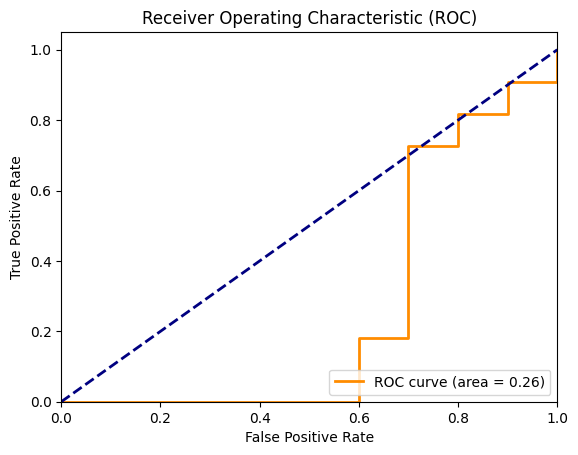

In [ ]:
# prompt: plot the graph of this model using logistic regression

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (e.g., "M" for mines)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba, pos_label="M")

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Model evaluation


In [ ]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,Y_train) #This compares our predicted values vs the actual values

In [ ]:
print(f"Accuracy on training data is: {training_data_accuracy}")

Accuracy on training data is: 0.8342245989304813


In [ ]:
#accuracy on training data
X_test_prediction=model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test) #This compares our predicted values vs the actual values

In [ ]:
print(f"Accuracy on training data is: {test_data_accuracy}") #anything above 70% is good

Accuracy on training data is: 0.7619047619047619


Making a predictive system

In [ ]:
input_data=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)# 1 cause only 1 row is missing and only one instance we are finding

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print("The object is a rock");
else:
  print("This object is a mine")


['R']
The object is a rock
